In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pylab as pl

In [49]:
df_global = pd.read_csv('Data/Processed/global.csv')
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Exporters          1872 non-null   object 
 1   Year               1872 non-null   int64  
 2   Quantity (tonnes)  1872 non-null   float64
 3   Value (k Euro)     1872 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 58.6+ KB


In [52]:
df_global = df_global[(df_global['Quantity (tonnes)']>0) & (df_global['Value (k Euro)']>0)]

In [54]:
df_global

,Exporters,Year,Quantity (tonnes),Value (k Euro)
0,Netherlands,2010,138693.0,445281.0
1,Ireland,2010,130068.0,405769.0
2,New Zealand,2010,245393.0,688911.0
3,Germany,2010,110900.0,357912.0
4,Belgium,2010,74627.0,261367.0
...,...,...,...,...
1838,Mozambique,2021,1.0,4.0
1845,Israel,2021,1.0,4.0
1853,Viet Nam,2021,14.0,71.0
1863,Czech Republic,2021,2324.0,10391.0


<AxesSubplot:xlabel='Year', ylabel='Quantity (tonnes)'>

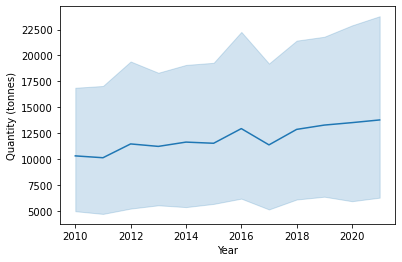

In [68]:
sns.lineplot(data=df_global,x='Year',y='Quantity (tonnes)')

/Users/markbrabazon/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 79.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/markbrabazon/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 79.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/markbrabazon/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 77.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/markbrabazon/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/markbrabazon/opt/anac

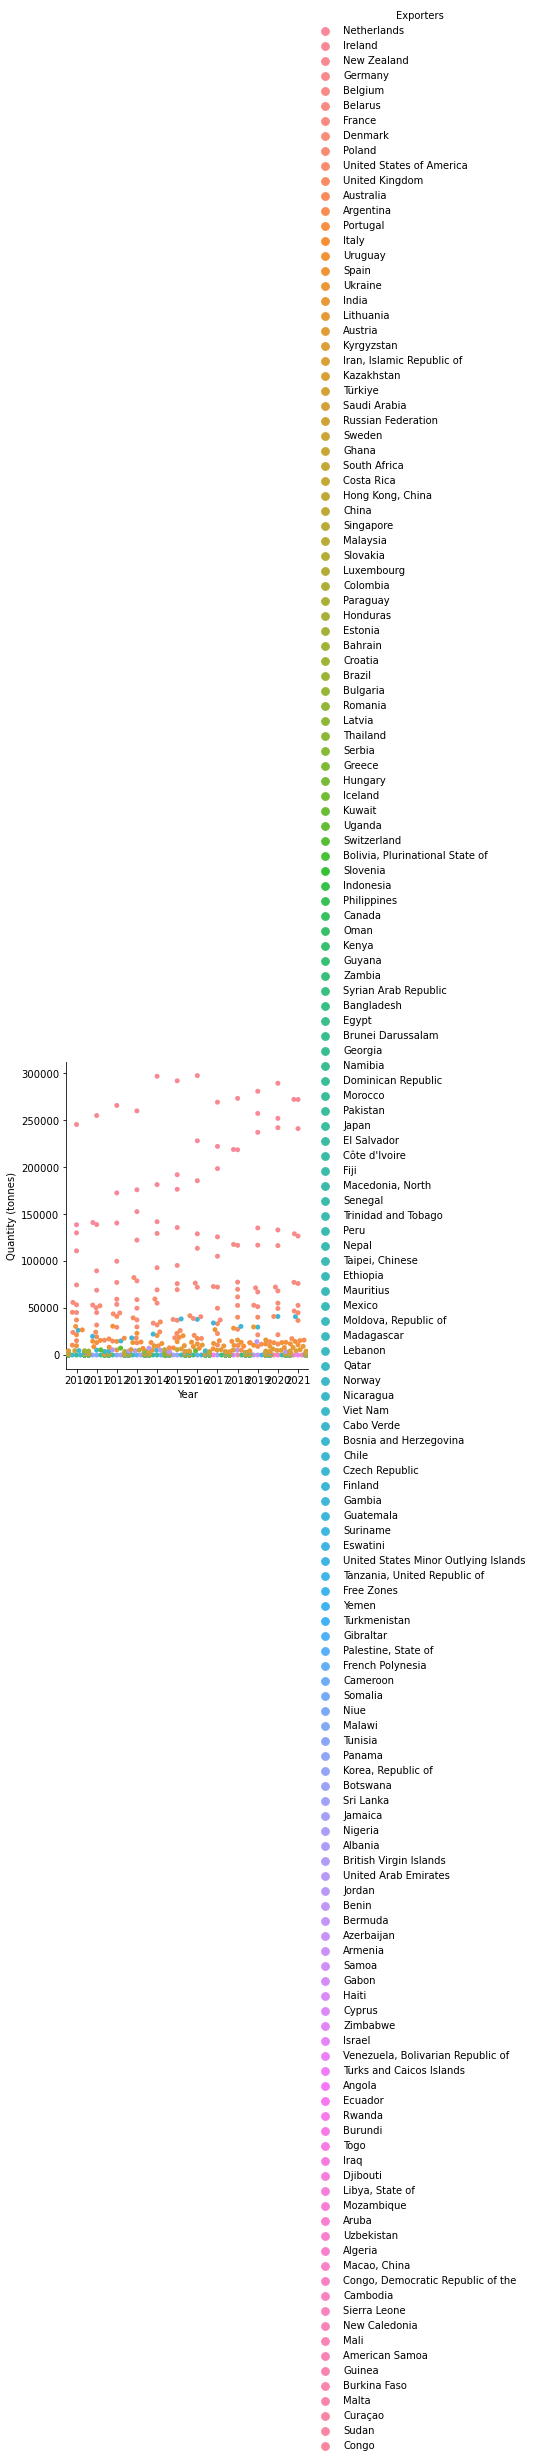

In [56]:
sns.catplot(data=df_global, x='Year', y='Quantity (tonnes)', hue='Exporters', kind="swarm")

In [88]:
df_global

,Exporters,Year,Quantity (tonnes),Value (k Euro)
0,Netherlands,2010,138693.0,445281.0
1,Ireland,2010,130068.0,405769.0
2,New Zealand,2010,245393.0,688911.0
3,Germany,2010,110900.0,357912.0
4,Belgium,2010,74627.0,261367.0
...,...,...,...,...
1838,Mozambique,2021,1.0,4.0
1845,Israel,2021,1.0,4.0
1853,Viet Nam,2021,14.0,71.0
1863,Czech Republic,2021,2324.0,10391.0


In [84]:
# Group data , getting monthly totals for each country
df_global['Year'] = df_global['Year'].astype('string')
df_global_grouped = df_global.groupby(['Exporters']).sum().reset_index()

In [85]:
df_global_grouped

,Exporters,Quantity (tonnes),Value (k Euro)
0,Albania,1.0,2.0
1,Algeria,85.0,99.0
2,American Samoa,1.0,1.0
3,Angola,275.0,306.0
4,Argentina,128807.0,424424.0
...,...,...,...
157,"Venezuela, Bolivarian Republic of",47.0,73.0
158,Viet Nam,324.0,1109.0
159,Yemen,2456.0,2296.0
160,Zambia,1308.0,2826.0


In [86]:

df_top_ten = df_global_grouped.sort_values('Quantity (tonnes)',ascending = False).head(10)
df_top_ten.head(60)

,Exporters,Quantity (tonnes),Value (k Euro)
105,New Zealand,3218191.0,11119854.0
103,Netherlands,2431234.0,9082000.0
73,Ireland,2301799.0,8553134.0
57,Germany,1456927.0,5519772.0
13,Belgium,1184758.0,4804606.0
51,France,804852.0,3740185.0
12,Belarus,759088.0,2965523.0
40,Denmark,543114.0,2654544.0
117,Poland,492121.0,1883846.0
154,United States of America,458179.0,1489000.0


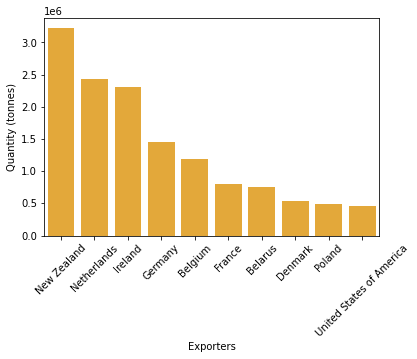

In [87]:
# sns.barplot(data=df_top_ten,x='Exporters',y='Quantity (tonnes)',rotation=45)

yellow = '#FFB11E'
by_school = sns.barplot(x='Exporters',y ='Quantity (tonnes)',data = df_top_ten,color=yellow,ci=None)
for item in by_school.get_xticklabels():
    item.set_rotation(45)

In [ ]:
sns.catplot(data=df_top_ten)

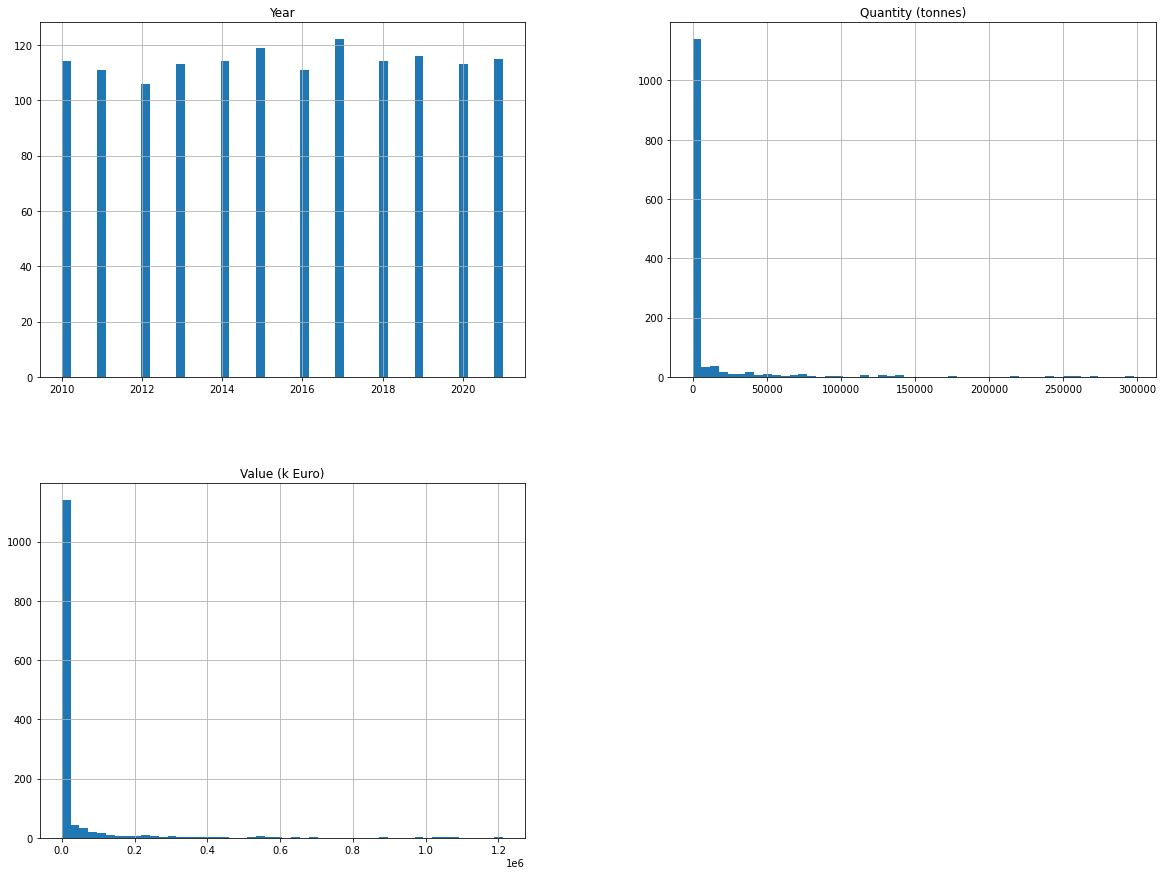

In [65]:
df_global_grouped.hist(figsize=(20,15),bins=50);

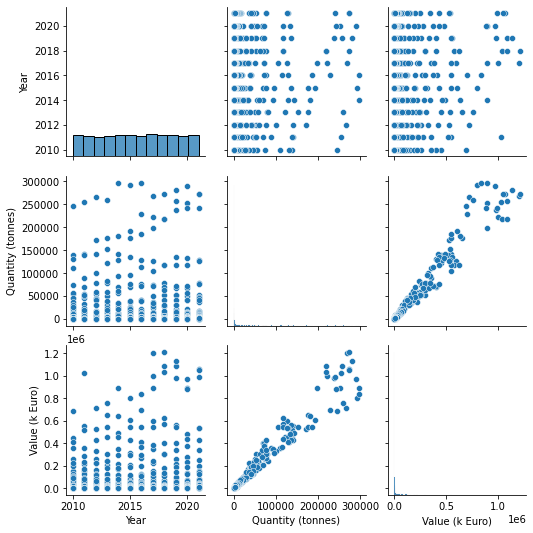

In [60]:
# pd.plotting.scatter_matrix(df_global);
sns.pairplot(df_global)

In [31]:
df_global_grouped.describe()

,Year,Quantity (tonnes),Value (k Euro)
count,12.000000,1.200000e+01,1.200000e+01
mean,2015.500000,1.367921e+06,5.133006e+06
std,3.605551,1.503807e+05,1.203172e+06
min,2010.000000,1.123468e+06,3.684210e+06
25%,2012.750000,1.254194e+06,4.300240e+06
50%,2015.500000,1.378544e+06,4.532390e+06
75%,2018.250000,1.481227e+06,6.429968e+06
max,2021.000000,1.583800e+06,6.946495e+06


In [409]:
df_main = pd.read_csv('Data/Processed/main.csv')
df_main.describe()

,Value (k Euro),Quantity (tonnes),Year,Population,GDP per capita ($US),GDP ($US),Inflation Rate,GDP Growth
count,32913.000000,32913.000000,32913.000000,3.291300e+04,32913.000000,32913.000000,32913.000000,32913.000000
mean,940.119406,252.418999,2015.633549,6.004848e+07,19151.363836,862.486053,4.695172,2.814025
std,3661.016793,930.550672,3.712387,1.891087e+08,20853.909656,2729.438129,7.881356,5.357911
min,0.000000,0.000000,2010.000000,1.055000e+04,324.285000,0.032000,-14.400000,-50.300000
25%,0.000000,0.000000,2012.000000,3.708610e+06,3688.531000,18.696000,1.200000,1.200000
50%,8.000000,1.848000,2016.000000,1.096521e+07,10170.061000,130.916000,2.800000,3.000000
75%,254.000000,66.000000,2019.000000,4.580875e+07,29411.884000,432.912000,5.600000,5.300000
max,172602.000000,21275.231000,2022.000000,1.417173e+09,136701.396000,25035.164000,254.900000,86.800000


In [418]:
df_main['Year'] = df_main['Year'].astype('string')

In [419]:
df_main

,Partner,Month Date,Value (k Euro),Quantity (tonnes),Year,Month,Country,Partner Code,Population,GDP per capita ($US),GDP ($US),Inflation Rate,GDP Growth
0,United Kingdom,2010-01-01,8328.0,2695.000,2010,Jan,Ireland,GBR,62766365.0,39731.624,2493.557,3.3,2.1
1,Germany,2010-01-01,3223.0,1607.000,2010,Jan,Ireland,DEU,81776930.0,42379.710,3402.444,1.1,4.2
2,France,2010-01-01,1703.0,613.000,2010,Jan,Ireland,FRA,65030575.0,42178.577,2647.348,1.7,1.8
3,Belgium,2010-01-01,826.0,224.000,2010,Jan,Ireland,BEL,10895586.0,44448.170,481.814,2.3,2.9
4,Denmark,2010-01-01,0.0,0.000,2010,Jan,Ireland,DNK,5547683.0,58177.162,321.995,2.2,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32908,Brunei Darussalam,2022-09-01,0.0,0.000,2022,Sep,New Zealand,BRN,449002.0,42939.398,18.464,2.5,1.2
32909,Belize,2022-09-01,0.0,0.000,2022,Sep,New Zealand,BLZ,405272.0,6096.324,2.676,6.6,3.5
32910,Cambodia,2022-09-01,61.0,7.586,2022,Sep,New Zealand,KHM,16767842.0,1771.384,28.330,5.2,5.1
32911,Algeria,2022-09-01,0.0,0.000,2022,Sep,New Zealand,DZA,44903225.0,4151.437,187.155,9.7,4.7


In [412]:
df = df_main.groupby(['Country','Year']).sum().reset_index()
df

,Country,Year,Value (k Euro),Quantity (tonnes),Population,GDP per capita ($US),GDP ($US),Inflation Rate,GDP Growth
0,Ireland,2010,399337.0,128279.000,3.952191e+10,1.123249e+07,576054.390,2719.8,2257.8
1,Ireland,2011,517758.0,138474.000,3.939607e+10,1.173657e+07,608144.652,3205.5,1859.7
2,Ireland,2012,420091.0,139969.000,3.884599e+10,1.096399e+07,563020.272,2871.6,1432.8
3,Ireland,2013,539552.0,151897.000,3.741328e+10,1.132104e+07,588766.500,2299.2,1172.8
4,Ireland,2014,482800.0,140445.684,3.674949e+10,1.154570e+07,614016.545,2045.2,1515.0
5,Ireland,2015,539025.0,174838.659,3.599062e+10,1.058644e+07,600761.570,1232.7,1569.0
6,Ireland,2016,530671.0,175927.173,3.880143e+10,1.100867e+07,646442.964,1660.2,1242.6
7,Ireland,2017,886012.0,197456.994,4.156446e+10,1.195659e+07,716251.740,2658.0,1538.4
8,Ireland,2018,1105147.0,222493.582,4.063563e+10,1.305952e+07,767840.066,2604.7,1462.1
9,Ireland,2019,1072713.0,253635.566,4.037399e+10,1.295341e+07,780859.672,1770.4,1197.2


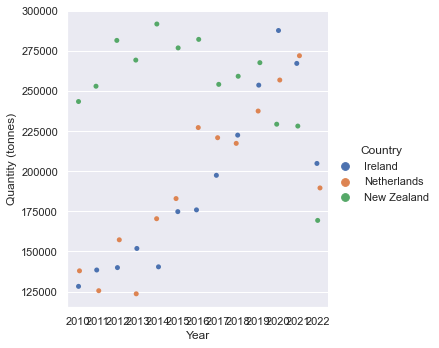

In [420]:
sns.catplot(data=df,x='Year',y='Quantity (tonnes)',hue='Country')

# sns.pairplot(df,hue='Country',vars=['Country','Value (k Euro)','Quantity (tonnes)','Population'])

KeyboardInterrupt: 

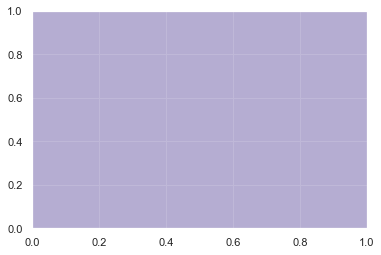

In [417]:
# df2 = df_main[['Partner','Population','GDP ($US)','GDP per capita ($US)','Inflation Rate','GDP Growth']]
# df2 = df2.drop_duplicates()
# sns.histplot(df2)

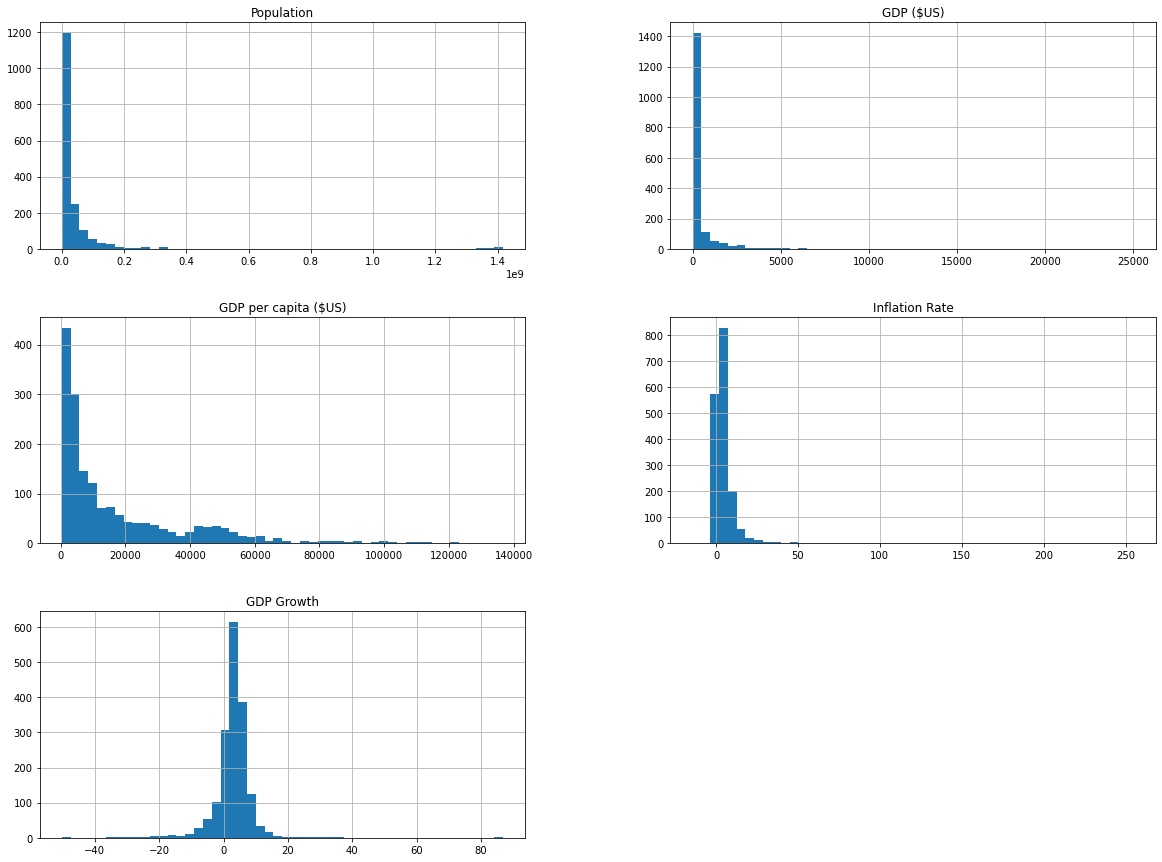

In [113]:
df2.hist(figsize=(20,15),bins=50);

In [114]:
df2.describe()

,Population,GDP ($US),GDP per capita ($US),Inflation Rate,GDP Growth
count,1.723000e+03,1723.000000,1723.000000,1723.000000,1723.000000
mean,4.843942e+07,580.396433,17662.413919,4.826001,2.880267
std,1.693389e+08,2083.336437,21792.311231,9.521926,5.747451
min,1.055000e+04,0.032000,324.285000,-14.400000,-50.300000
25%,2.092970e+06,12.969500,3034.814000,1.200000,1.200000
50%,9.535079e+06,62.721000,8078.305000,2.900000,3.100000
75%,3.567316e+07,343.137500,24989.721000,5.800000,5.500000
max,1.417173e+09,25035.164000,136701.396000,254.900000,86.800000


In [106]:
type(df2)

numpy.ndarray

In [37]:
df_proj_features = pd.read_csv('Data/Processed/projected_features.csv')
df_proj_features.describe()

,Year,Population,GDP per capita ($US),GDP ($US),Inflation Rate,GDP Growth
count,27594.000000,2.759400e+04,27594.000000,27594.000000,27594.000000,27594.000000
mean,2024.857143,4.882658e+07,22266.804331,786.465009,5.721820,3.479615
std,1.520858,1.706227e+08,27147.335959,3037.939308,10.879524,3.090475
min,2022.000000,1.131200e+04,471.606000,0.064000,1.000000,-35.000000
25%,2024.000000,2.244368e+06,3708.274000,16.436000,2.100000,2.100000
50%,2025.000000,1.014354e+07,10401.934000,84.531000,3.200000,3.100000
75%,2026.000000,3.798997e+07,32912.469000,490.575000,5.500000,4.600000
max,2027.000000,1.479579e+09,151082.067000,30281.524000,210.000000,56.700000


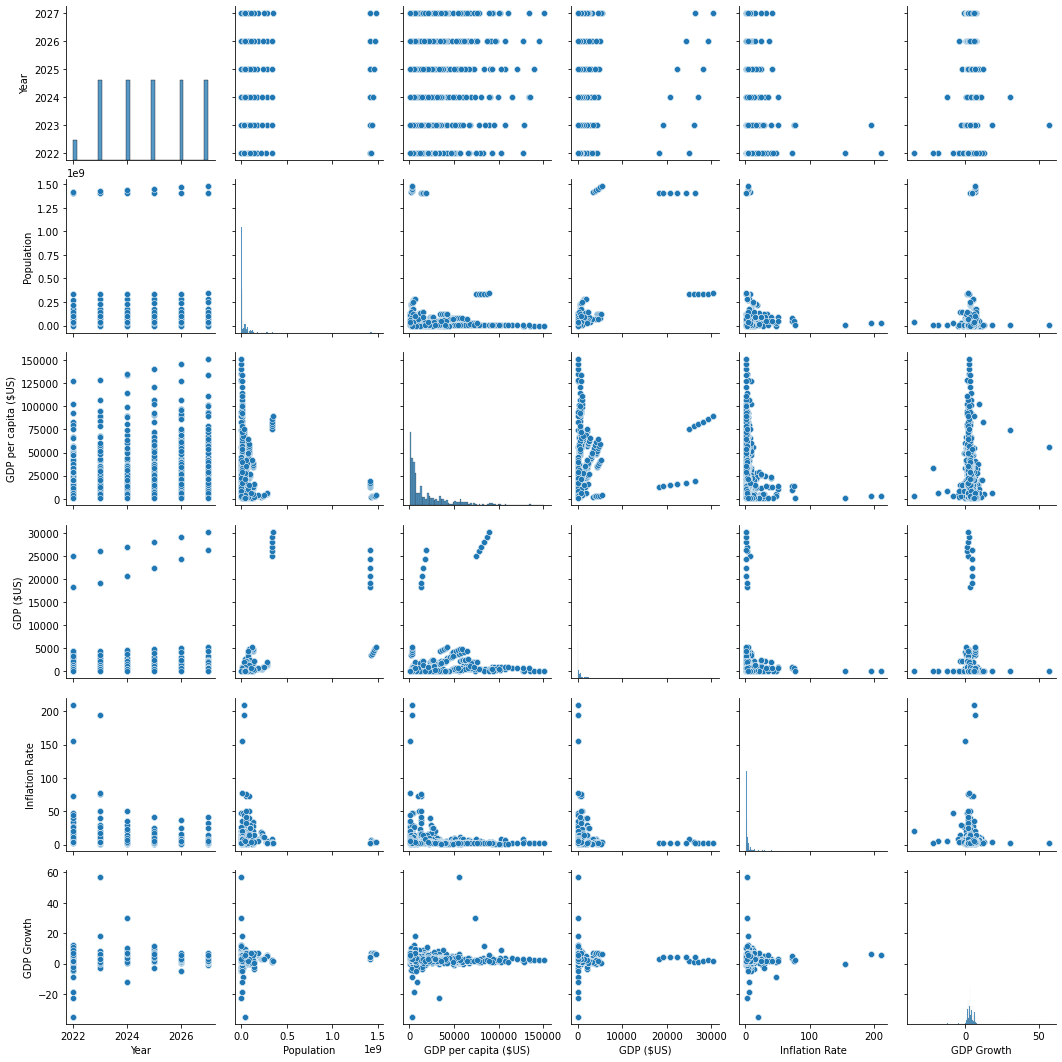

In [38]:
sns.pairplot(df_proj_features)

In [115]:
df_main

,Partner,Month Date,Value (k Euro),Quantity (tonnes),Year,Month,Country,Partner Code,Population,GDP per capita ($US),GDP ($US),Inflation Rate,GDP Growth
0,United Kingdom,2010-01-01,8328.0,2695.000,2010,Jan,Ireland,GBR,62766365.0,39731.624,2493.557,3.3,2.1
1,Germany,2010-01-01,3223.0,1607.000,2010,Jan,Ireland,DEU,81776930.0,42379.710,3402.444,1.1,4.2
2,France,2010-01-01,1703.0,613.000,2010,Jan,Ireland,FRA,65030575.0,42178.577,2647.348,1.7,1.8
3,Belgium,2010-01-01,826.0,224.000,2010,Jan,Ireland,BEL,10895586.0,44448.170,481.814,2.3,2.9
4,Denmark,2010-01-01,0.0,0.000,2010,Jan,Ireland,DNK,5547683.0,58177.162,321.995,2.2,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32908,Brunei Darussalam,2022-09-01,0.0,0.000,2022,Sep,New Zealand,BRN,449002.0,42939.398,18.464,2.5,1.2
32909,Belize,2022-09-01,0.0,0.000,2022,Sep,New Zealand,BLZ,405272.0,6096.324,2.676,6.6,3.5
32910,Cambodia,2022-09-01,61.0,7.586,2022,Sep,New Zealand,KHM,16767842.0,1771.384,28.330,5.2,5.1
32911,Algeria,2022-09-01,0.0,0.000,2022,Sep,New Zealand,DZA,44903225.0,4151.437,187.155,9.7,4.7


In [126]:
df_yearly = df_main[['Country','Year',
                       'Quantity (tonnes)',
                       'Value (k Euro)']].groupby(['Country','Year']).sum().reset_index()
df_yearly

,Country,Year,Quantity (tonnes),Value (k Euro)
0,Ireland,2010,128279.000,399337.0
1,Ireland,2011,138474.000,517758.0
2,Ireland,2012,139969.000,420091.0
3,Ireland,2013,151897.000,539552.0
4,Ireland,2014,140445.684,482800.0
5,Ireland,2015,174838.659,539025.0
6,Ireland,2016,175927.173,530671.0
7,Ireland,2017,197456.994,886012.0
8,Ireland,2018,222493.582,1105147.0
9,Ireland,2019,253635.566,1072713.0


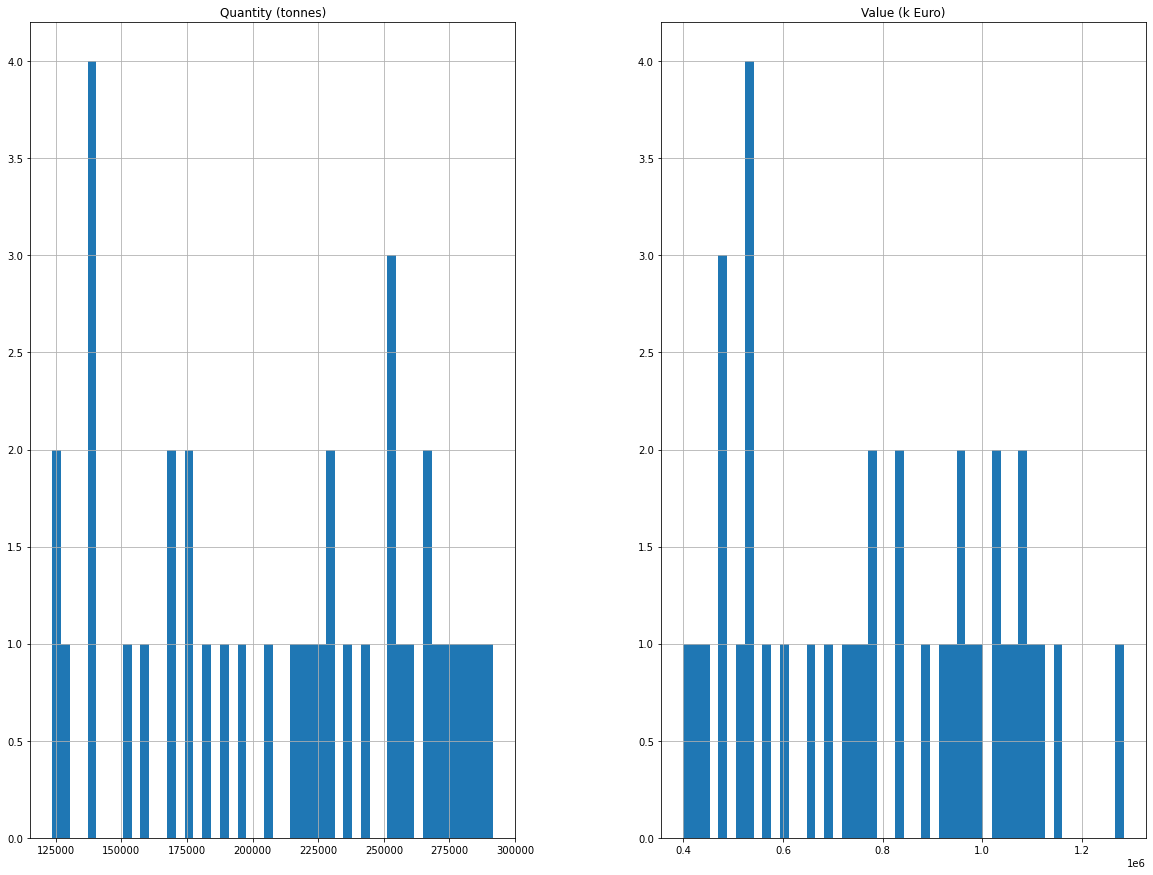

In [127]:
df_yearly.hist(figsize=(20,15),bins=50);

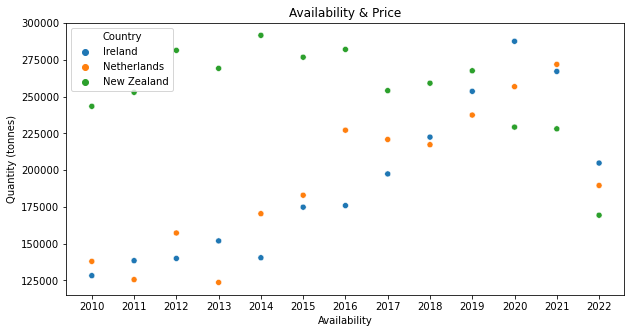

In [129]:
plt.figure(figsize=(10,5))
plt.title('Availability & Price')
# plt.xlabel('Availability')
# plt.ylabel('Price')
sns.scatterplot(x=df_yearly['Year'],y=df_yearly['Quantity (tonnes)'],hue=df_yearly['Country'])
plt.show()

In [169]:
df_ie = df_main[(df_main['Country'] == 'Ireland')][['Country','Year','Partner','Quantity (tonnes)','Value (k Euro)']]
# df_ie = df_main[['Country','Year','Partner','Quantity (tonnes)','Value (k Euro)']]

In [170]:
df_ie

,Country,Year,Partner,Quantity (tonnes),Value (k Euro)
0,Ireland,2010,United Kingdom,2695.000,8328.0
1,Ireland,2010,Germany,1607.000,3223.0
2,Ireland,2010,France,613.000,1703.0
3,Ireland,2010,Belgium,224.000,826.0
4,Ireland,2010,Denmark,0.000,0.0
...,...,...,...,...,...
6580,Ireland,2022,United Arab Emirates,0.050,0.0
6581,Ireland,2022,Türkiye,0.000,0.0
6582,Ireland,2022,Egypt,0.000,0.0
6583,Ireland,2022,Slovakia,0.000,0.0


In [143]:
df_ie_2020 = df_ie[(df_ie['Year']=='2020') & (df_ie['Quantity (tonnes)']>1000) & (df_ie['Value (k Euro)']>1000)]
df_ie_2020

,Country,Year,Partner,Quantity (tonnes),Value (k Euro)
5241,Ireland,2020,United Kingdom,2933.507,10702.0
5242,Ireland,2020,Germany,2229.119,7679.0
5244,Ireland,2020,Belgium,1047.175,4186.0
5255,Ireland,2020,Netherlands,2159.129,7504.0
5284,Ireland,2020,United States of America,1610.556,9778.0
...,...,...,...,...,...
5724,Ireland,2020,United States of America,1086.178,6354.0
5725,Ireland,2020,United Kingdom,8984.220,31003.0
5726,Ireland,2020,Germany,2651.747,8830.0
5727,Ireland,2020,France,2159.774,7026.0


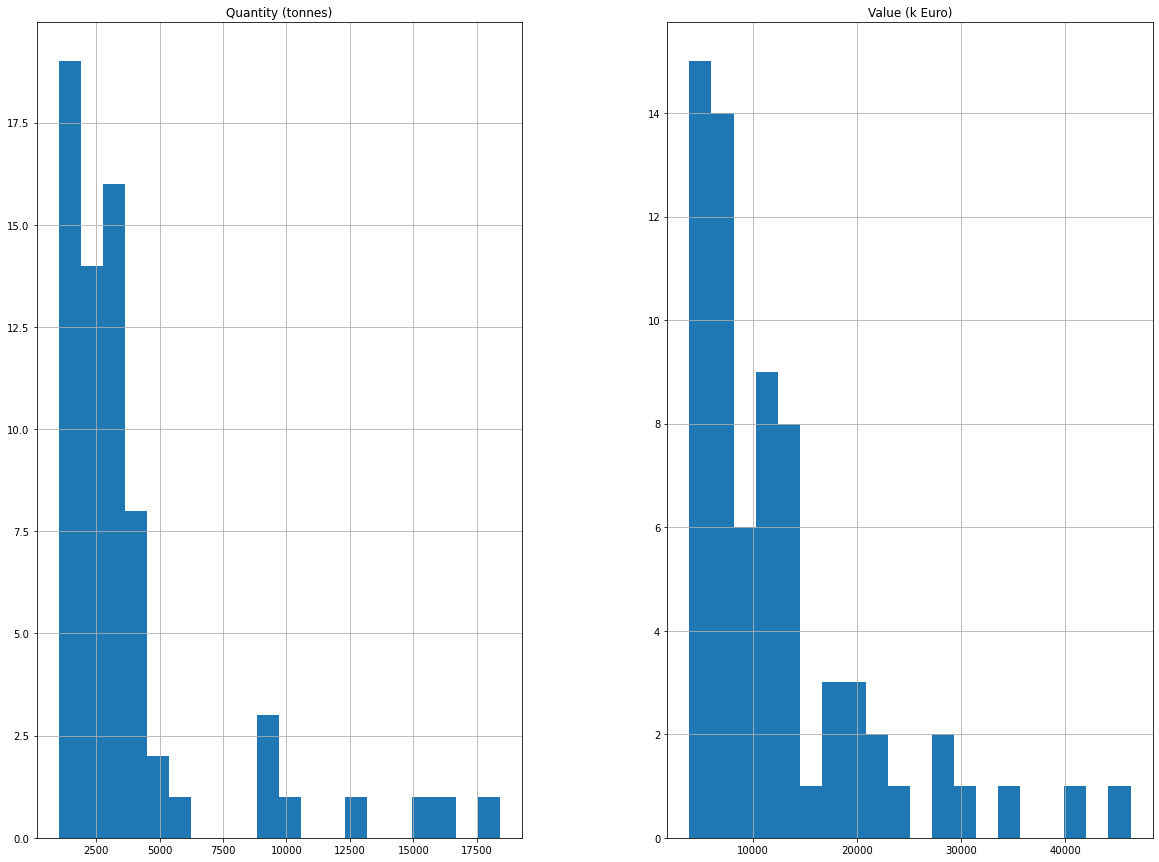

In [145]:
df_ie_2020.hist(figsize=(20,15),bins=20);

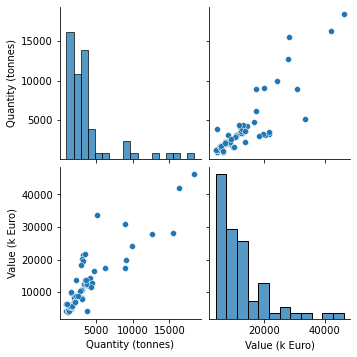

In [146]:
sns.pairplot(df_ie_2020)

In [421]:
df_plots = df_main[['Country','Year','Partner',
                    'Quantity (tonnes)','Value (k Euro)']].groupby(['Country','Year','Partner']).sum().reset_index()
# df_plots[(df_plots['Partner'] == 'Germany') & (df_plots['Year'] == '2020')]
# df_plots = df_plots[(df_plots['Quantity (tonnes)']>100) & (df_plots['Value (k Euro)']>1000)]
df_plots = df_plots[(df_plots['Quantity (tonnes)']>2000)]
# df_plots[(df_plots['Country']=='Ireland')&(df_plots['Year']=='2020')]


In [422]:
df_plots

,Country,Year,Partner,Quantity (tonnes),Value (k Euro)
7,Ireland,2010,Belgium,20266.000,68535.0
16,Ireland,2010,France,13553.000,41645.0
18,Ireland,2010,Germany,42515.000,112858.0
35,Ireland,2010,Netherlands,9332.000,30714.0
50,Ireland,2010,United Kingdom,33261.000,112781.0
...,...,...,...,...,...
2853,New Zealand,2022,Saudi Arabia,11339.483,62358.0
2856,New Zealand,2022,Singapore,3327.408,20147.0
2867,New Zealand,2022,United Arab Emirates,2560.186,13978.0
2868,New Zealand,2022,United States of America,4683.916,26706.0


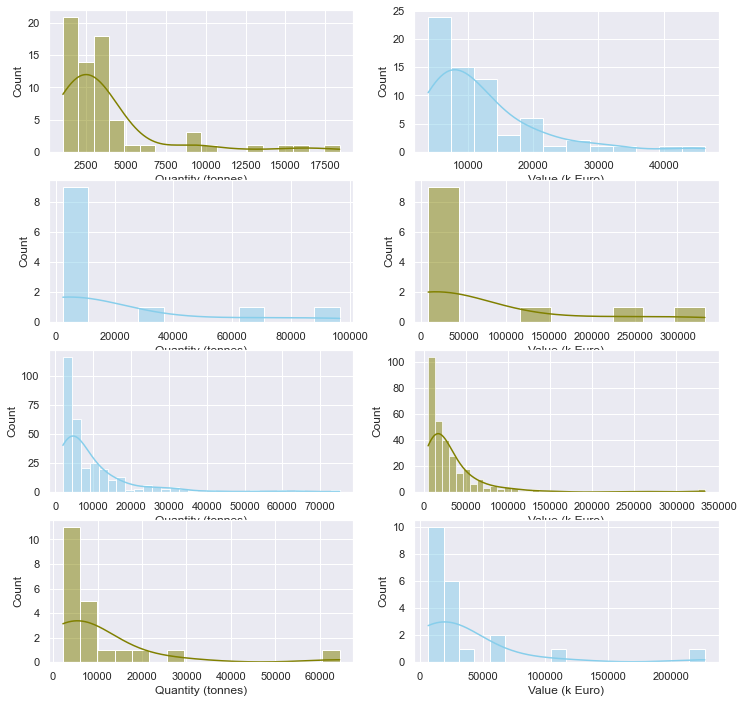

In [423]:
# # libraries & dataset
# import seaborn as sns
# import matplotlib.pyplot as plt
# # set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
# df = sns.load_dataset("df_yearly")

# df_year = df_yearly[(df_yearly['Year']=='2010')]
# df_year['Quantity (k tonnes)'] = df_year['Quantity (tonnes)'] / 1000

fig, axs = plt.subplots(4, 2, figsize=(12, 12))

sns.histplot(data=df_ie[(df_ie['Year']=='2020') & (df_ie['Quantity (tonnes)']>1000)], 
             x="Quantity (tonnes)", kde=True, color="olive", ax=axs[0, 0])
sns.histplot(data=df_ie[(df_ie['Year']=='2020') & (df_ie['Quantity (tonnes)']>1000)], 
             x="Value (k Euro)", kde=True, color="skyblue", ax=axs[0, 1])


# sns.histplot(data=df_main[(df_main['Year']=='2020') & (df_main['Quantity (tonnes)']>1000) & (df_main['Country']=='Netherlands')],
#              x="Quantity (tonnes)", kde=True, color="skyblue", ax=axs[1, 0])
# sns.histplot(data=df_yearly[(df_yearly['Country']=='Netherlands')], 
#              x="Value (k Euro)", kde=True, color="olive", ax=axs[1, 1])

sns.histplot(data=df_plots[(df_plots['Country']=='Netherlands') & (df_plots['Year']=='2020')], 
             x="Quantity (tonnes)", kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=df_plots[(df_plots['Country']=='Netherlands') & (df_plots['Year']=='2020')], 
             x="Value (k Euro)", kde=True, color="olive", ax=axs[1, 1])

sns.histplot(data=df_plots[(df_plots['Country']=='New Zealand')], 
             x="Quantity (tonnes)", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=df_plots[(df_plots['Country']=='New Zealand')], 
             x="Value (k Euro)", kde=True, color="olive", ax=axs[2, 1])

df_test = df_plots[(df_plots['Quantity (tonnes)']>1000)]

sns.histplot(data=df_test[(df_test['Country']=='New Zealand') & (df_test['Year']=='2020')], 
             x="Quantity (tonnes)", kde=True, color="olive", ax=axs[3, 0])
sns.histplot(data=df_test[(df_test['Country']=='New Zealand') & (df_test['Year']=='2020')], 
             x="Value (k Euro)", kde=True, color="skyblue", ax=axs[3, 1])

# sns.histplot(data=df_test[(df_test['Country']=='Ireland') & (df_test['Year']=='2020')], 
#              x="Quantity (tonnes)", kde=True, color="olive", ax=axs[3, 0])
# sns.histplot(data=df_test[(df_test['Country']=='Ireland') & (df_test['Year']=='2020')], 
#              x="Value (k Euro)", kde=True, color="skyblue", ax=axs[3, 1])

plt.show()

In [221]:
df_main[(df_main['Year']=='2020') & (df_main['Quantity (tonnes)']>1000) & (df_main['Country']=='Netherlands')]

,Partner,Month Date,Value (k Euro),Quantity (tonnes),Year,Month,Country,Partner Code,Population,GDP per capita ($US),GDP ($US),Inflation Rate,GDP Growth
17990,Belgium,2020-01-01,9715.0,2770.543,2020,Jan,Netherlands,BEL,11538604.0,45238.677,521.260,0.4,-5.7
17991,France,2020-01-01,21171.0,5728.129,2020,Jan,Netherlands,FRA,67571107.0,40377.526,2636.022,0.5,-7.9
17992,Germany,2020-01-01,34489.0,9610.006,2020,Jan,Netherlands,DEU,83160871.0,46735.314,3886.555,0.4,-3.7
18079,Belgium,2020-02-01,9768.0,2782.333,2020,Feb,Netherlands,BEL,11538604.0,45238.677,521.260,0.4,-5.7
18080,France,2020-02-01,21549.0,5763.352,2020,Feb,Netherlands,FRA,67571107.0,40377.526,2636.022,0.5,-7.9
18081,Germany,2020-02-01,24810.0,7011.428,2020,Feb,Netherlands,DEU,83160871.0,46735.314,3886.555,0.4,-3.7
18168,Belgium,2020-03-01,9683.0,2806.150,2020,Mar,Netherlands,BEL,11538604.0,45238.677,521.260,0.4,-5.7
18169,France,2020-03-01,22963.0,6370.108,2020,Mar,Netherlands,FRA,67571107.0,40377.526,2636.022,0.5,-7.9
18170,Germany,2020-03-01,32862.0,9075.906,2020,Mar,Netherlands,DEU,83160871.0,46735.314,3886.555,0.4,-3.7
18189,United States of America,2020-03-01,9074.0,1397.677,2020,Mar,Netherlands,USA,331501080.0,63078.471,20893.750,1.2,-3.4


In [222]:
df_ie

,Country,Year,Partner,Quantity (tonnes),Value (k Euro)
0,Ireland,2010,United Kingdom,2695.000,8328.0
1,Ireland,2010,Germany,1607.000,3223.0
2,Ireland,2010,France,613.000,1703.0
3,Ireland,2010,Belgium,224.000,826.0
4,Ireland,2010,Denmark,0.000,0.0
...,...,...,...,...,...
6580,Ireland,2022,United Arab Emirates,0.050,0.0
6581,Ireland,2022,Türkiye,0.000,0.0
6582,Ireland,2022,Egypt,0.000,0.0
6583,Ireland,2022,Slovakia,0.000,0.0


In [223]:
df_ie_2020

,Country,Year,Partner,Quantity (tonnes),Value (k Euro)
5241,Ireland,2020,United Kingdom,2933.507,10702.0
5242,Ireland,2020,Germany,2229.119,7679.0
5244,Ireland,2020,Belgium,1047.175,4186.0
5255,Ireland,2020,Netherlands,2159.129,7504.0
5284,Ireland,2020,United States of America,1610.556,9778.0
...,...,...,...,...,...
5724,Ireland,2020,United States of America,1086.178,6354.0
5725,Ireland,2020,United Kingdom,8984.220,31003.0
5726,Ireland,2020,Germany,2651.747,8830.0
5727,Ireland,2020,France,2159.774,7026.0


In [225]:
df_proj_features

,Partner,Month Date,Year,Month,Country,Partner Code,Population,GDP per capita ($US),GDP ($US),Inflation Rate,GDP Growth
0,Afghanistan,2023-01-01,2023,Jan,Ireland,AFG,42239854.0,4308.014,164.414,6.4,3.9
1,Algeria,2023-01-01,2023,Jan,Ireland,DZA,45606480.0,4162.176,190.254,8.7,2.6
2,Andorra,2023-01-01,2023,Jan,Ireland,AND,80088.0,40643.312,3.360,2.8,2.0
3,Angola,2023-01-01,2023,Jan,Ireland,AGO,36684202.0,3997.713,135.558,11.8,3.4
4,Antigua and Barbuda,2023-01-01,2023,Jan,Ireland,ATG,94298.0,18264.769,1.867,4.5,5.6
...,...,...,...,...,...,...,...,...,...,...,...
27589,Uzbekistan,2027-12-01,2027,Dec,New Zealand,UZB,37960940.0,3919.416,152.631,5.1,5.0
27590,Vanuatu,2027-12-01,2027,Dec,New Zealand,VUT,366230.0,3502.830,1.338,3.1,3.0
27591,"Venezuela, Bolivarian Republic of",2027-12-01,2027,Dec,New Zealand,VEN,30871303.0,561.660,17.183,7.4,5.2
27592,Viet Nam,2027-12-01,2027,Dec,New Zealand,VNM,101228069.0,6600.184,682.853,3.5,6.8


In [226]:
df_main

,Partner,Month Date,Value (k Euro),Quantity (tonnes),Year,Month,Country,Partner Code,Population,GDP per capita ($US),GDP ($US),Inflation Rate,GDP Growth
0,United Kingdom,2010-01-01,8328.0,2695.000,2010,Jan,Ireland,GBR,62766365.0,39731.624,2493.557,3.3,2.1
1,Germany,2010-01-01,3223.0,1607.000,2010,Jan,Ireland,DEU,81776930.0,42379.710,3402.444,1.1,4.2
2,France,2010-01-01,1703.0,613.000,2010,Jan,Ireland,FRA,65030575.0,42178.577,2647.348,1.7,1.8
3,Belgium,2010-01-01,826.0,224.000,2010,Jan,Ireland,BEL,10895586.0,44448.170,481.814,2.3,2.9
4,Denmark,2010-01-01,0.0,0.000,2010,Jan,Ireland,DNK,5547683.0,58177.162,321.995,2.2,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32908,Brunei Darussalam,2022-09-01,0.0,0.000,2022,Sep,New Zealand,BRN,449002.0,42939.398,18.464,2.5,1.2
32909,Belize,2022-09-01,0.0,0.000,2022,Sep,New Zealand,BLZ,405272.0,6096.324,2.676,6.6,3.5
32910,Cambodia,2022-09-01,61.0,7.586,2022,Sep,New Zealand,KHM,16767842.0,1771.384,28.330,5.2,5.1
32911,Algeria,2022-09-01,0.0,0.000,2022,Sep,New Zealand,DZA,44903225.0,4151.437,187.155,9.7,4.7


In [230]:
df_features = df_main[['Partner','Year','Country','Population','GDP per capita ($US)',
                       'GDP ($US)','Inflation Rate','GDP Growth']].drop_duplicates()
df_features

,Partner,Year,Country,Population,GDP per capita ($US),GDP ($US),Inflation Rate,GDP Growth
0,United Kingdom,2010,Ireland,62766365.0,39731.624,2493.557,3.3,2.1
1,Germany,2010,Ireland,81776930.0,42379.710,3402.444,1.1,4.2
2,France,2010,Ireland,65030575.0,42178.577,2647.348,1.7,1.8
3,Belgium,2010,Ireland,10895586.0,44448.170,481.814,2.3,2.9
4,Denmark,2010,Ireland,5547683.0,58177.162,321.995,2.2,1.9
...,...,...,...,...,...,...,...,...
32364,Brunei Darussalam,2022,New Zealand,449002.0,42939.398,18.464,2.5,1.2
32365,Belize,2022,New Zealand,405272.0,6096.324,2.676,6.6,3.5
32366,Cambodia,2022,New Zealand,16767842.0,1771.384,28.330,5.2,5.1
32367,Algeria,2022,New Zealand,44903225.0,4151.437,187.155,9.7,4.7


In [234]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2871 entries, 0 to 32368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Partner               2871 non-null   object 
 1   Year                  2871 non-null   string 
 2   Country               2871 non-null   object 
 3   Population            2871 non-null   float64
 4   GDP per capita ($US)  2871 non-null   float64
 5   GDP ($US)             2871 non-null   float64
 6   Inflation Rate        2871 non-null   float64
 7   GDP Growth            2871 non-null   float64
dtypes: float64(5), object(2), string(1)
memory usage: 201.9+ KB


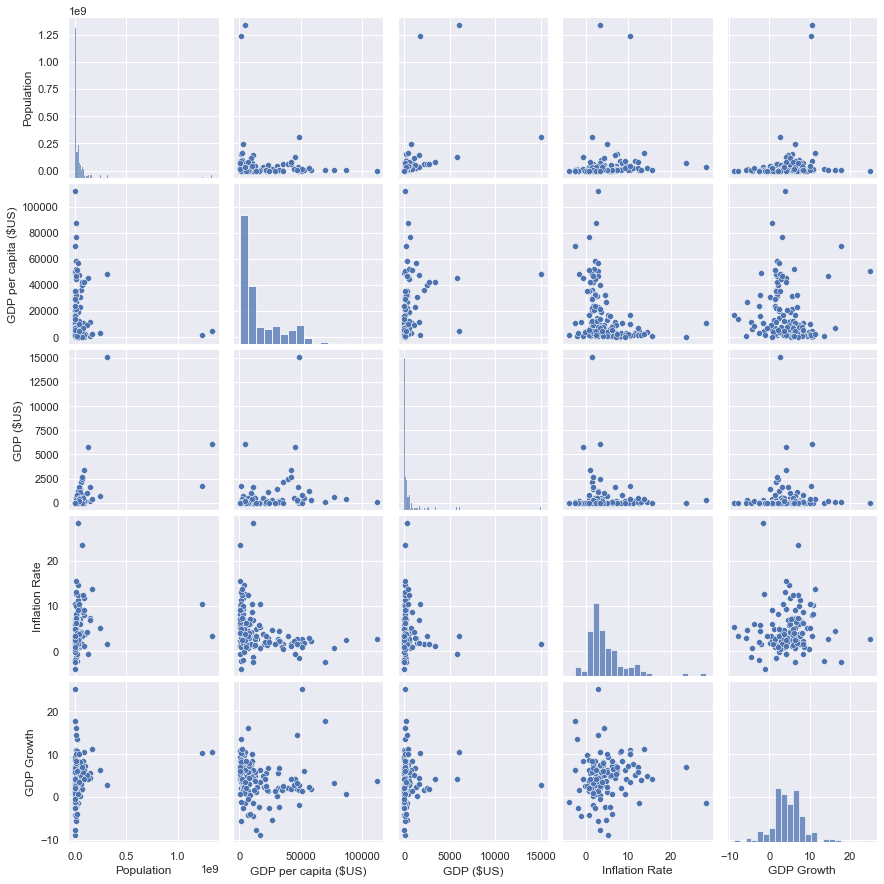

In [235]:
sns.pairplot(df_features[(df_features['Year']=='2010')])

In [236]:
df_features[(df_features['GDP ($US)']<1)]

,Partner,Year,Country,Population,GDP per capita ($US),GDP ($US),Inflation Rate,GDP Growth
13,Seychelles,2010,Ireland,89770.0,10805.099,0.970,-2.4,6.3
43,Saint Vincent and the Grenadines,2010,Ireland,109308.0,6613.132,0.720,0.8,-4.3
6675,Guinea-Bissau,2010,Netherlands,1567220.0,644.344,0.941,1.1,5.6
6676,Timor-Leste,2010,Netherlands,1088486.0,806.414,0.882,5.2,9.3
20975,Solomon Islands,2010,New Zealand,540394.0,1604.149,0.847,0.9,8.6
...,...,...,...,...,...,...,...,...
32347,Vanuatu,2022,New Zealand,326740.0,3049.750,0.984,4.6,1.7
32349,Tuvalu,2022,New Zealand,11312.0,5899.889,0.064,5.7,3.0
32350,Tonga,2022,New Zealand,106858.0,5008.125,0.501,8.5,-2.0
32356,Marshall Islands,2022,New Zealand,41569.0,4858.526,0.271,6.4,1.5


In [245]:

df_features[(df_features['Year']=='2022') & (df_features['Country']=='Ireland')].sort_values(['GDP ($US)'],ascending = False)


,Partner,Year,Country,Population,GDP per capita ($US),GDP ($US),Inflation Rate,GDP Growth
6280,United States of America,2022,Ireland,3.333856e+08,75179.586,25035.164,8.1,1.6
6260,China,2022,Ireland,1.412313e+09,12970.328,18321.197,2.2,3.2
6269,Japan,2022,Ireland,1.249648e+08,34357.864,4300.621,2.0,1.7
6244,Germany,2022,Ireland,8.302862e+07,48397.797,4031.149,8.5,1.5
6243,United Kingdom,2022,Ireland,6.754458e+07,47317.565,3198.470,9.1,3.6
6245,France,2022,Ireland,6.787723e+07,42330.451,2778.090,5.8,2.5
6268,Italy,2022,Ireland,5.891879e+07,33739.750,1996.934,8.7,3.2
6262,Australia,2022,Ireland,2.594160e+07,66407.604,1724.787,6.5,3.8
6250,Spain,2022,Ireland,4.737428e+07,29198.086,1389.927,8.8,4.3
6274,Saudi Arabia,2022,Ireland,3.640882e+07,27941.493,1010.588,2.7,7.6


In [246]:
df_features[(df_features['Year']=='2022') & (df_features['Partner']=='Ireland')].sort_values(['GDP ($US)'],ascending = False)


,Partner,Year,Country,Population,GDP per capita ($US),GDP ($US),Inflation Rate,GDP Growth
20182,Ireland,2022,Netherlands,5067773.0,102217.439,519.776,8.4,9.0


In [247]:
df_main

,Partner,Month Date,Value (k Euro),Quantity (tonnes),Year,Month,Country,Partner Code,Population,GDP per capita ($US),GDP ($US),Inflation Rate,GDP Growth
0,United Kingdom,2010-01-01,8328.0,2695.000,2010,Jan,Ireland,GBR,62766365.0,39731.624,2493.557,3.3,2.1
1,Germany,2010-01-01,3223.0,1607.000,2010,Jan,Ireland,DEU,81776930.0,42379.710,3402.444,1.1,4.2
2,France,2010-01-01,1703.0,613.000,2010,Jan,Ireland,FRA,65030575.0,42178.577,2647.348,1.7,1.8
3,Belgium,2010-01-01,826.0,224.000,2010,Jan,Ireland,BEL,10895586.0,44448.170,481.814,2.3,2.9
4,Denmark,2010-01-01,0.0,0.000,2010,Jan,Ireland,DNK,5547683.0,58177.162,321.995,2.2,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32908,Brunei Darussalam,2022-09-01,0.0,0.000,2022,Sep,New Zealand,BRN,449002.0,42939.398,18.464,2.5,1.2
32909,Belize,2022-09-01,0.0,0.000,2022,Sep,New Zealand,BLZ,405272.0,6096.324,2.676,6.6,3.5
32910,Cambodia,2022-09-01,61.0,7.586,2022,Sep,New Zealand,KHM,16767842.0,1771.384,28.330,5.2,5.1
32911,Algeria,2022-09-01,0.0,0.000,2022,Sep,New Zealand,DZA,44903225.0,4151.437,187.155,9.7,4.7


In [260]:
df = df_main[['Country','Partner','Year','Population',
              'GDP per capita ($US)','GDP ($US)','Inflation Rate',
              'GDP Growth','Quantity (tonnes)','Value (k Euro)']]
df = df.groupby(['Country','Partner','Year','Population',
              'GDP per capita ($US)','GDP ($US)','Inflation Rate']).sum().reset_index()
df[(df['Country']=='New Zealand')]

,Country,Partner,Year,Population,GDP per capita ($US),GDP ($US),Inflation Rate,GDP Growth,Quantity (tonnes),Value (k Euro)
1834,New Zealand,Algeria,2010,35856344.0,4480.719,161.207,3.9,43.2,1938.449,5723.0
1835,New Zealand,Algeria,2011,36543541.0,5447.600,200.020,4.5,34.8,1555.056,4806.0
1836,New Zealand,Algeria,2012,37260563.0,5575.653,209.059,8.9,40.8,2357.276,6029.0
1837,New Zealand,Algeria,2013,38000626.0,5477.055,209.755,3.3,33.6,3956.890,10958.0
1838,New Zealand,Algeria,2014,38760168.0,5466.329,213.810,2.9,45.6,3253.526,9343.0
...,...,...,...,...,...,...,...,...,...,...
2866,New Zealand,Yemen,2012,26223391.0,1421.171,35.401,9.9,28.8,311.286,783.0
2867,New Zealand,Yemen,2013,26984002.0,1580.182,40.415,11.0,57.6,0.000,0.0
2868,New Zealand,Yemen,2014,27753304.0,1647.034,43.229,8.2,-2.4,190.001,448.0
2869,New Zealand,Yemen,2015,28516545.0,1576.912,42.444,22.0,-336.0,0.000,0.0


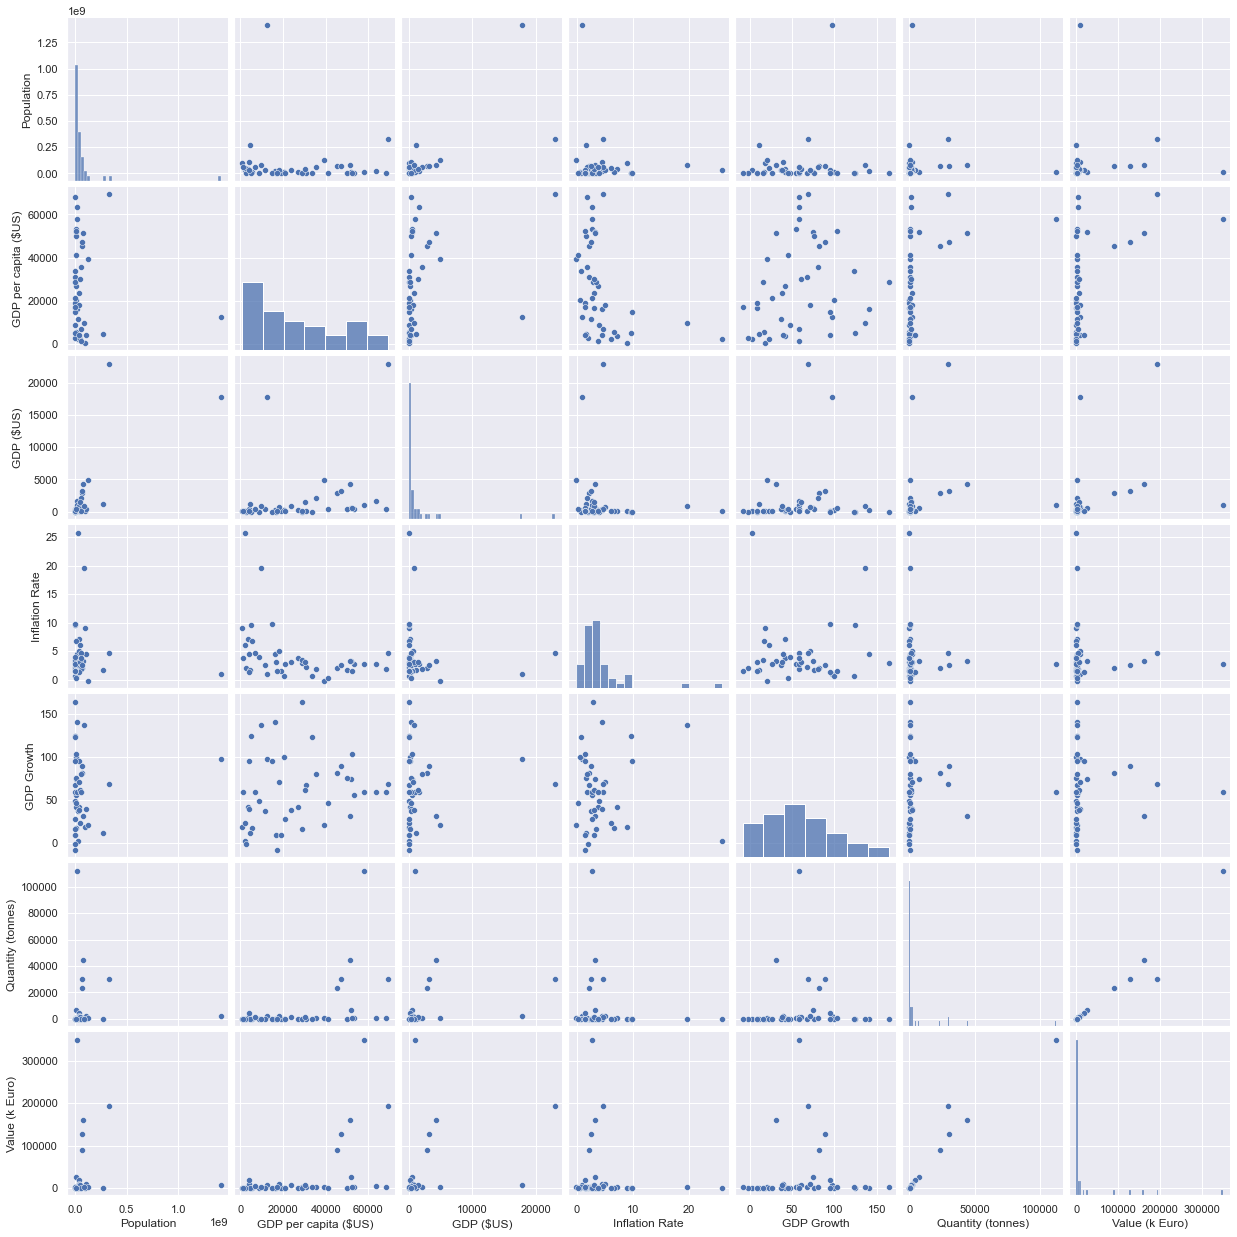

In [265]:
sns.pairplot(df[(df['Year']=='2021') & (df['Country']=='Ireland')])

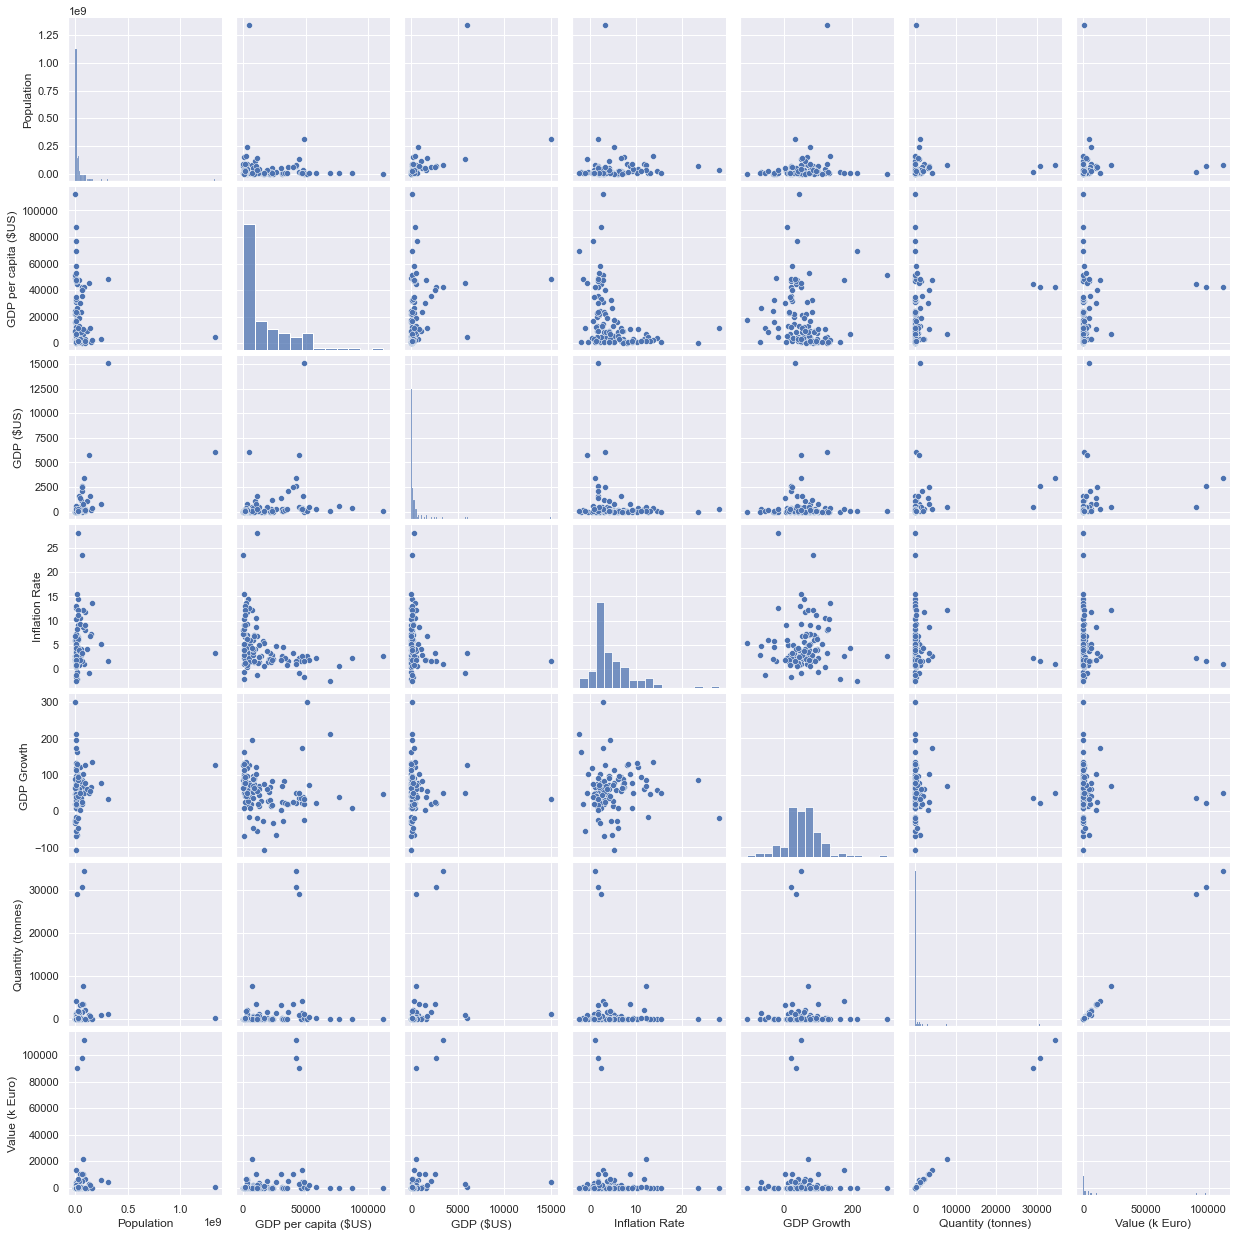

In [262]:
sns.pairplot(df[(df['Year']=='2010') & (df['Country']=='Netherlands')])

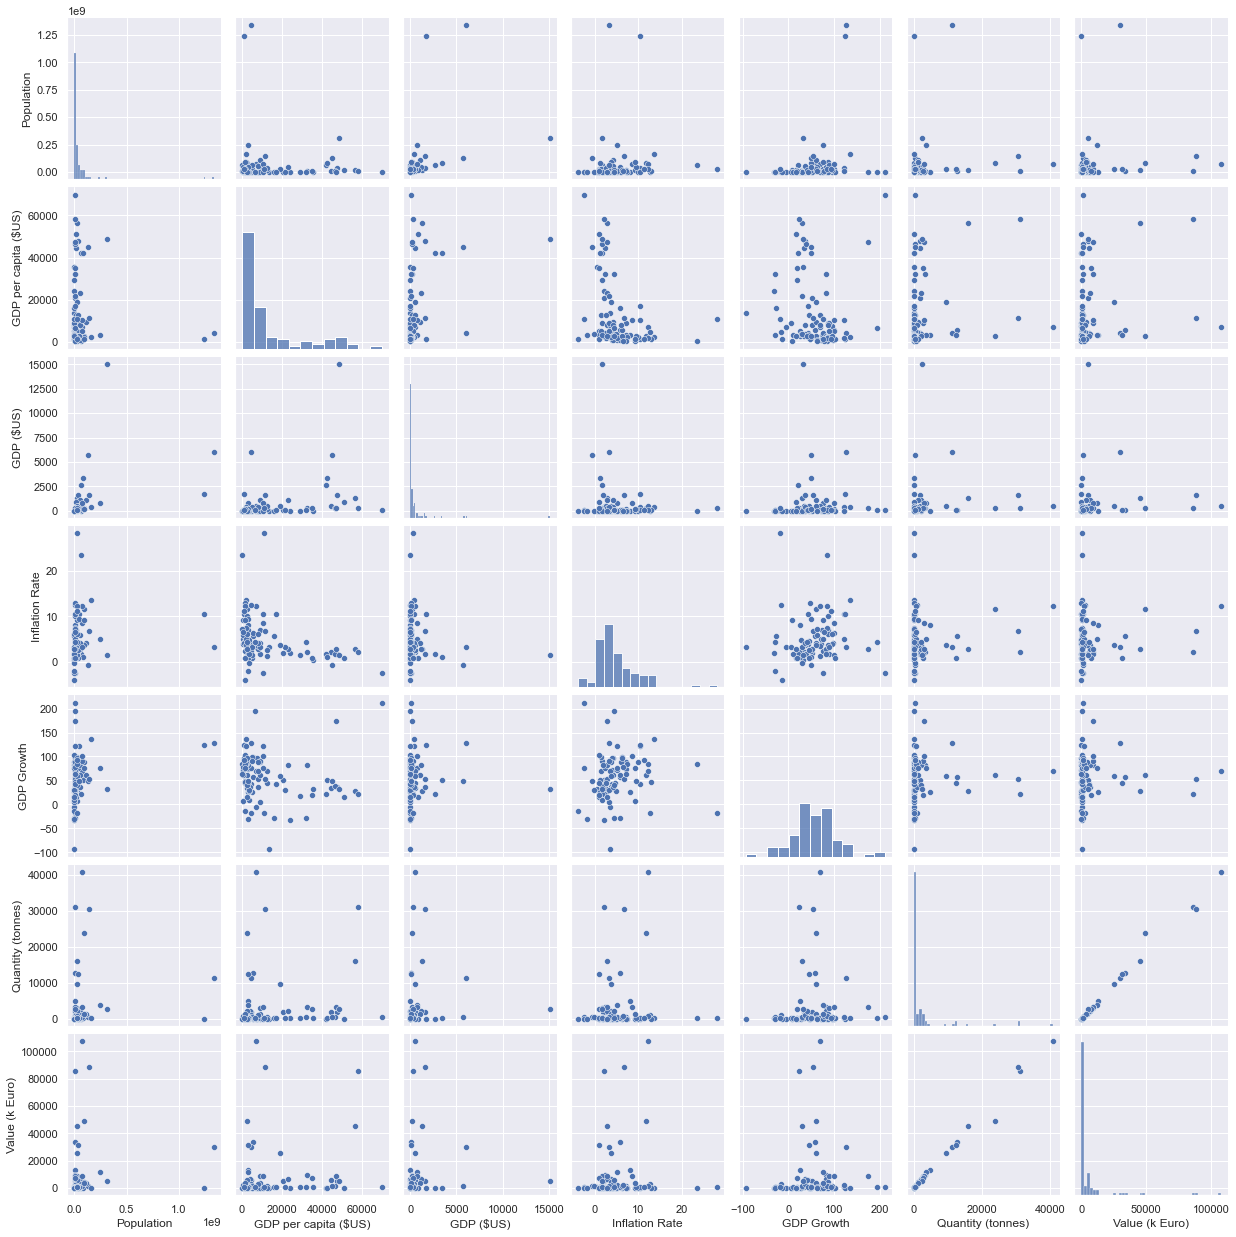

In [263]:
sns.pairplot(df[(df['Year']=='2010') & (df['Country']=='New Zealand')])

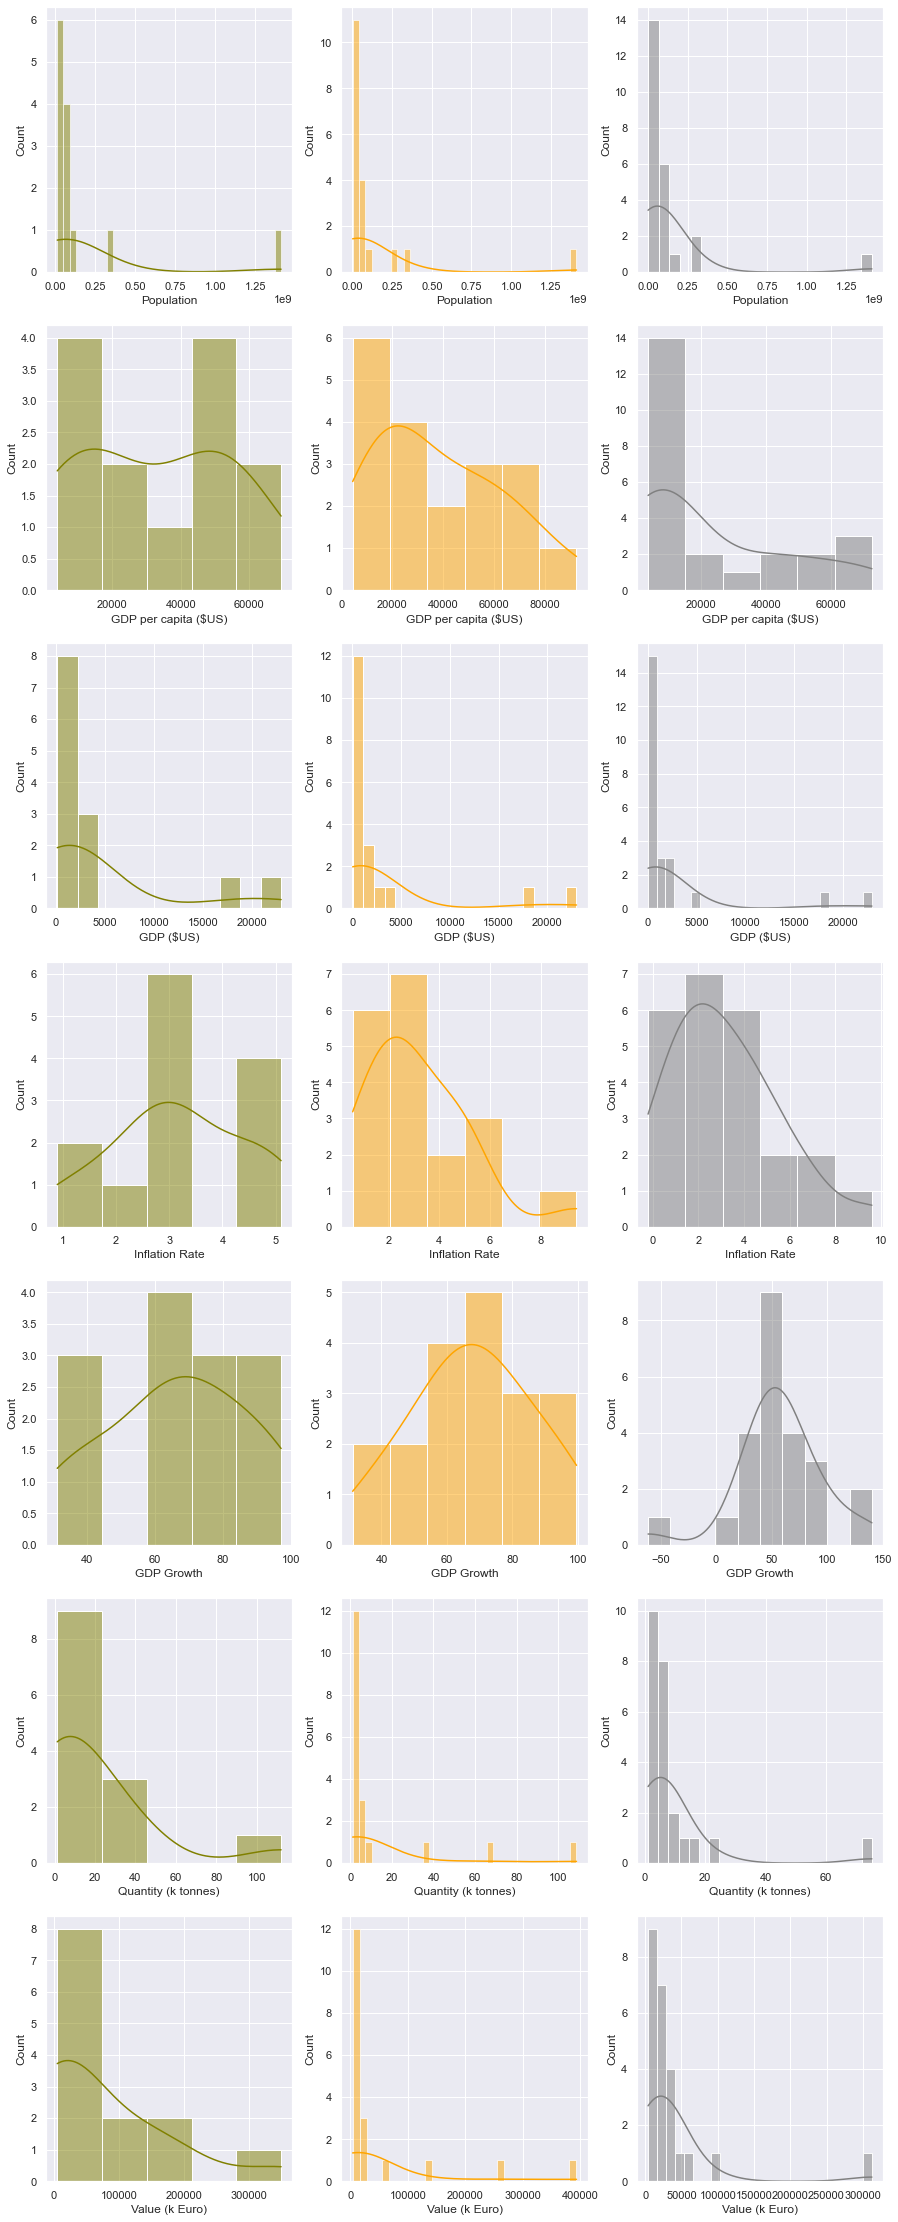

In [393]:
# # libraries & dataset
# import seaborn as sns
# import matplotlib.pyplot as plt
# # set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
# df = sns.load_dataset("df_yearly")

# df_year = df_yearly[(df_yearly['Year']=='2010')]
# df_year['Quantity (k tonnes)'] = df_year['Quantity (tonnes)'] / 1000

df['Quantity (k tonnes)'] = df['Quantity (tonnes)'] / 1000

df = df[(df['Quantity (k tonnes)']>1)]
fig, axs = plt.subplots(7, 3, figsize=(15, 40))

# sns.histplot(data=df[(df['Year']=='2020') & (df['Quantity (tonnes)']>1000)], x="Quantity (k tonnes)", kde=True, color="olive", ax=axs[0, 0])

sns.histplot(data=df[(df['Country']=='Ireland')], x="Population", kde=True, color="olive", ax=axs[0,0])
sns.histplot(data=df[(df['Country']=='Netherlands')], x="Population", kde=True, color="orange", ax=axs[0,1])
sns.histplot(data=df[(df['Country']=='New Zealand')], x="Population", kde=True, color="grey", ax=axs[0,2])

sns.histplot(data=df[(df['Country']=='Ireland')], x="GDP per capita ($US)", kde=True, color="olive", ax=axs[1,0])
sns.histplot(data=df[(df['Country']=='Netherlands')], x="GDP per capita ($US)", kde=True, color="orange", ax=axs[1,1])
sns.histplot(data=df[(df['Country']=='New Zealand')], x="GDP per capita ($US)", kde=True, color="grey", ax=axs[1,2])

sns.histplot(data=df[(df['Country']=='Ireland')], x="GDP ($US)", kde=True, color="olive", ax=axs[2,0])
sns.histplot(data=df[(df['Country']=='Netherlands')], x="GDP ($US)", kde=True, color="orange", ax=axs[2,1])
sns.histplot(data=df[(df['Country']=='New Zealand')], x="GDP ($US)", kde=True, color="grey", ax=axs[2,2])

sns.histplot(data=df[(df['Country']=='Ireland')], x="Inflation Rate", kde=True, color="olive", ax=axs[3,0])
sns.histplot(data=df[(df['Country']=='Netherlands')], x="Inflation Rate", kde=True, color="orange", ax=axs[3,1])
sns.histplot(data=df[(df['Country']=='New Zealand')], x="Inflation Rate", kde=True, color="grey", ax=axs[3,2])

sns.histplot(data=df[(df['Country']=='Ireland')], x="GDP Growth", kde=True, color="olive", ax=axs[4,0])
sns.histplot(data=df[(df['Country']=='Netherlands')],x="GDP Growth", kde=True, color="orange", ax=axs[4,1])
sns.histplot(data=df[(df['Country']=='New Zealand')], x="GDP Growth", kde=True, color="grey", ax=axs[4,2])

sns.histplot(data=df[(df['Country']=='Ireland')], x="Quantity (k tonnes)", kde=True, color="olive", ax=axs[5,0])
sns.histplot(data=df[(df['Country']=='Netherlands')], x="Quantity (k tonnes)", kde=True, color="orange", ax=axs[5,1])
sns.histplot(data=df[(df['Country']=='New Zealand')], x="Quantity (k tonnes)", kde=True, color="grey", ax=axs[5,2])

sns.histplot(data=df[(df['Country']=='Ireland')], x="Value (k Euro)", kde=True, color="olive", ax=axs[6,0])
sns.histplot(data=df[(df['Country']=='Netherlands')], x="Value (k Euro)", kde=True, color="orange", ax=axs[6,1])
sns.histplot(data=df[(df['Country']=='New Zealand')], x="Value (k Euro)", kde=True, color="grey", ax=axs[6,2])

plt.show()

In [394]:
df_main[(df_main['GDP Growth']<-20)]['Partner'].unique()

array(['Bahamas', 'Libya, State of', 'Sierra Leone', 'Eritrea', 'Yemen',
       'Lebanon', 'Maldives', 'Macao, China', 'Ukraine', 'Saint Lucia',
       'Antigua and Barbuda'], dtype=object)

(array([4., 1., 3., 4., 3., 7., 0., 0., 1., 4., 4., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([0.6 , 1.04, 1.48, 1.92, 2.36, 2.8 , 3.24, 3.68, 4.12, 4.56, 5.  ,
        5.44, 5.88, 6.32, 6.76, 7.2 , 7.64, 8.08, 8.52, 8.96, 9.4 ]),
 <BarContainer object of 20 artists>)

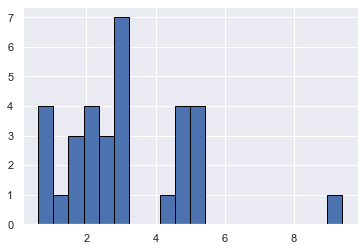

In [395]:
import math
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
# lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

h=df[(df['Country'] != 'New Zealand')]

#create histogram to visualize values in dataset
plt.hist(h['Inflation Rate'], edgecolor='black', bins=20)

<AxesSubplot:xlabel='GDP Growth', ylabel='Count'>

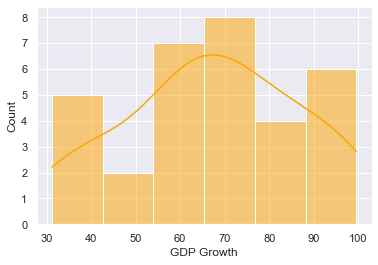

In [396]:
sns.histplot(data=h, x="GDP Growth", kde=True, color="orange")

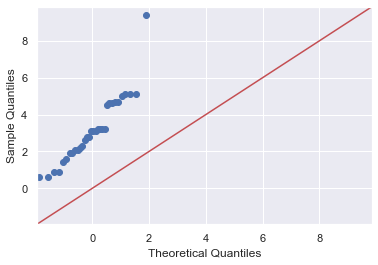

In [397]:
import math
# import numpy as np
# from scipy.stats import lognorm
import statsmodels.api as sm

# import matplotlib.pyplot as plt

#make this example reproducible
# np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
# lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(h['Inflation Rate'], line='45')

plt.show()

In [398]:
from scipy.stats import shapiro 
shapiro(h['GDP Growth'])

ShapiroResult(statistic=0.9651719331741333, pvalue=0.37778565287590027)

<AxesSubplot:xlabel='Inflation Rate', ylabel='Country'>

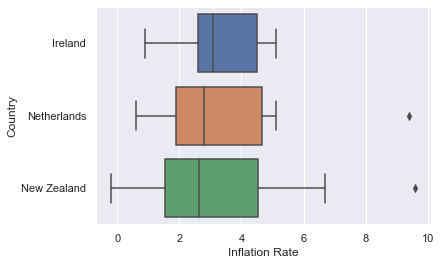

In [399]:
sns.boxplot(data=df, x="Inflation Rate", y="Country")

In [400]:
h=df[(df['GDP Growth'] < 120) & (df['GDP Growth'] > -50)]
# h=h[(h['Country'] == 'New Zealand')]
h

,Country,Partner,Year,Population,GDP per capita ($US),GDP ($US),Inflation Rate,GDP Growth,Quantity (tonnes),Value (k Euro),Quantity (k tonnes)
95,Ireland,Belgium,2021,1.159295e+07,51849.343,599.107,3.2,74.4,6981.884,25587.0,6.981884
121,Ireland,China,2021,1.412360e+09,12561.687,17744.640,0.9,97.2,1931.666,7902.0,1.931666
194,Ireland,Egypt,2021,1.092622e+08,4144.422,423.145,4.5,39.6,2094.925,8260.0,2.094925
207,Ireland,France,2021,6.774963e+07,45187.772,2957.425,2.1,81.6,23091.212,89240.0,23.091212
233,Ireland,Germany,2021,8.319608e+07,51237.643,4262.767,3.2,31.2,44368.476,160931.0,44.368476
385,Ireland,Morocco,2021,3.707658e+07,3934.310,142.867,1.4,94.8,4359.346,17892.0,4.359346
399,Ireland,Netherlands,2021,1.753304e+07,57996.912,1013.520,2.8,58.8,112161.059,349494.0,112.161059
430,Ireland,Poland,2021,3.774712e+07,17945.751,679.067,5.1,70.8,2321.415,9273.0,2.321415
444,Ireland,Saudi Arabia,2021,3.595040e+07,23507.276,833.541,3.1,38.4,1702.365,7222.0,1.702365
480,Ireland,South Africa,2021,5.939226e+07,6965.188,418.907,4.6,58.8,1299.697,5050.0,1.299697


<AxesSubplot:xlabel='GDP Growth', ylabel='Country'>

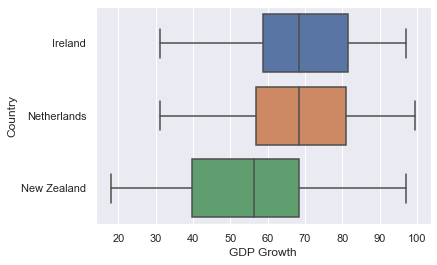

In [401]:
sns.boxplot(data=h, x="GDP Growth", y="Country")
# sns.boxplot(data=h, x="Inflation Rate")

(array([ 5.,  8.,  7., 17.,  7.,  9.]),
 array([18. , 31.6, 45.2, 58.8, 72.4, 86. , 99.6]),
 <BarContainer object of 6 artists>)

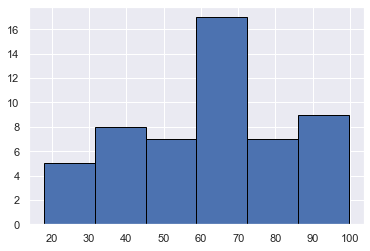

In [402]:
plt.hist(h['GDP Growth'], edgecolor='black', bins=6)

<AxesSubplot:xlabel='Quantity (k tonnes)', ylabel='Count'>

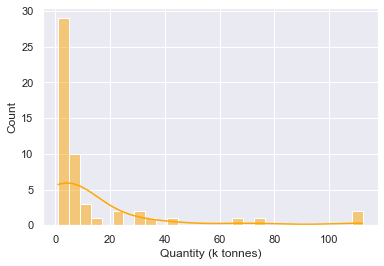

In [403]:
sns.histplot(data=h, x="Quantity (k tonnes)", kde=True, color="orange")

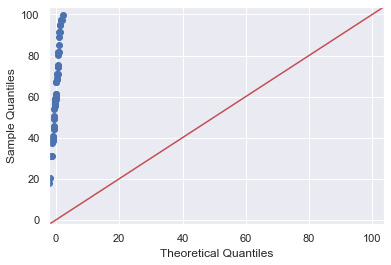

In [404]:
fig = sm.qqplot(h['GDP Growth'], line='45')

plt.show()

In [405]:
shapiro(h['GDP Growth'])

ShapiroResult(statistic=0.9726669788360596, pvalue=0.26244407892227173)

In [406]:
from scipy.stats import kstest
kstest(h['GDP Growth'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

<AxesSubplot:xlabel='GDP Growth', ylabel='Count'>

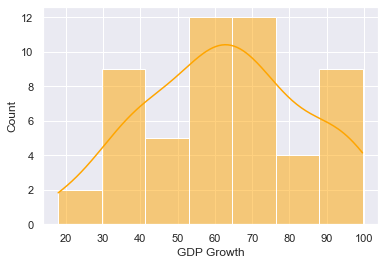

In [407]:
sns.histplot(data=h, x="GDP Growth", kde=True, color="orange")

<AxesSubplot:xlabel='GDP Growth', ylabel='Count'>

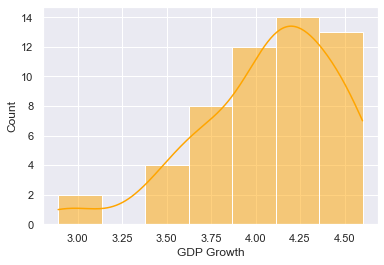

In [386]:
data_log = np.log(h['GDP Growth'])
sns.histplot(data=data_log, kde=True, color="orange")

<AxesSubplot:xlabel='GDP Growth', ylabel='Count'>

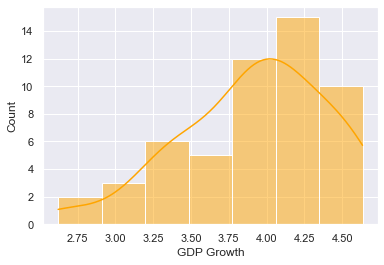

In [388]:
data_log = np.cbrt(h['GDP Growth'])
sns.histplot(data=data_log, kde=True, color="orange")

In [408]:
h

,Country,Partner,Year,Population,GDP per capita ($US),GDP ($US),Inflation Rate,GDP Growth,Quantity (tonnes),Value (k Euro),Quantity (k tonnes)
95,Ireland,Belgium,2021,1.159295e+07,51849.343,599.107,3.2,74.4,6981.884,25587.0,6.981884
121,Ireland,China,2021,1.412360e+09,12561.687,17744.640,0.9,97.2,1931.666,7902.0,1.931666
194,Ireland,Egypt,2021,1.092622e+08,4144.422,423.145,4.5,39.6,2094.925,8260.0,2.094925
207,Ireland,France,2021,6.774963e+07,45187.772,2957.425,2.1,81.6,23091.212,89240.0,23.091212
233,Ireland,Germany,2021,8.319608e+07,51237.643,4262.767,3.2,31.2,44368.476,160931.0,44.368476
385,Ireland,Morocco,2021,3.707658e+07,3934.310,142.867,1.4,94.8,4359.346,17892.0,4.359346
399,Ireland,Netherlands,2021,1.753304e+07,57996.912,1013.520,2.8,58.8,112161.059,349494.0,112.161059
430,Ireland,Poland,2021,3.774712e+07,17945.751,679.067,5.1,70.8,2321.415,9273.0,2.321415
444,Ireland,Saudi Arabia,2021,3.595040e+07,23507.276,833.541,3.1,38.4,1702.365,7222.0,1.702365
480,Ireland,South Africa,2021,5.939226e+07,6965.188,418.907,4.6,58.8,1299.697,5050.0,1.299697
